<a href="https://colab.research.google.com/github/gsangf10/Analysis_Algorithm/blob/main/Analysis_%EB%AC%B8%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학생의 정보로 성적 등급 예측

In [ ]:
# gender : 성별(M: 남, F: 여)
# Nationality : 국적
# PlaceofBirth : 출생국가
# StageID : 학교(초, 중, 고)
# GradeID : 성적 등급
# SectionID : 반 이름
# Topic: 수강 과목
# Semester : 수강한 학기 (1학기/ 2학기)
# Relation : 주 보호자와 학생의 관계
# raisedhands : 수업중 손을 든 횟수
# VisitedResources: 학생이 교과 과정을 방문한 횟수
# AnnouncementsView: 학생이 과목 공지사항을 방문한 횟수
# Discussion : 학생이 토론에 참여한 횟수
# ParentAnsweringSurvey : 부모가 학교 설문에 참여했는지 여부
# ParentschoolSatisfaction : 부모가 학교에 만족했는지 여부
# StudentAbscenceDays : 학생의 결석 횟수(7회 이상/미만)
# Class : 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)

# 판다스로 데이터 읽어오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/xAPI-Edu-Data.csv')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# 데이터의 개수, 데이터 타입, 결측치 확인

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


# 시각화

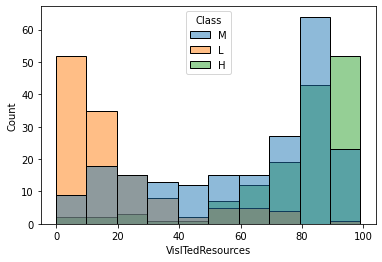

In [ ]:
import seaborn as sns

sns.histplot(x='VisITedResources', data=df, hue='Class')

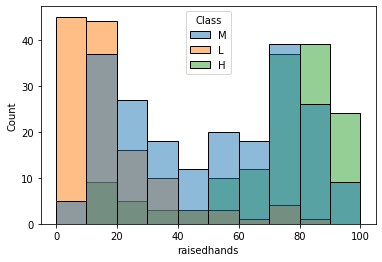

In [ ]:
sns.histplot(x='raisedhands', data=df, hue='Class')

# 시각화를 이용한 탐색적 분석
- 수치형 데이터의 탐색적 분석
-- 히스토그램을 이용해 각 수치데이터의 데이터 분포 및 상관관계 확인
- 범주형 데이터의 탐색적 분석 (count플롯을 이용)
-- 남녀의 성적 비율
-- 국적에 따른 성적 비율
-- 과목에 따른 성적 비율
-- 부모의 설문 참여에 따른 성적 비율

In [ ]:
# 성적을 숫자로 바꾸어 한눈에 파악하기 -> map을 이용해서 변환

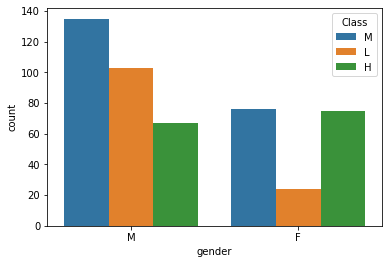

In [ ]:
sns.countplot(x='gender', data=df, hue='Class')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

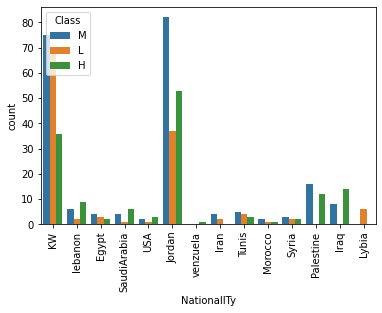

In [ ]:
sns.countplot(x='NationalITy', data=df, hue='Class')
plt.xticks(rotation=90)

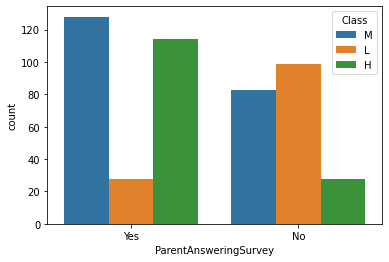

In [ ]:
sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class')

# 카테고리 데이터를 one-hot 벡터로 인코딩하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def one_hot_encode(col) :
  clen = len(col.unique()) # 범주 데이터의 개수 (== 단위행렬의 크기를 결정)
  rlen = len(col.values)

  eye1 = np.eye(clen) # 해당 컬럼의 범주별 데이터로 원핫인코딩된 행을 얻기 위한 단위행렬

  labeled_data = pd.Series(np.arange(len(col.unique())), index=col.unique()) # 해당 컬럼의 범주를 숫자형으로 레이블링(단위행렬에 적용하기 위함)
  eye_idx = labeled_data[col]  # 레이블된 데이터를 가져옴

  col_list = [] # 컬럼 명을 저장하기 위한 리스트
  for cate_nm in pd.unique(col) :
    col_nm = col.name + '_' + cate_nm # 인코딩된 각 컬럼의 이름 생성
    col_list.append(col_nm)
  
  return pd.DataFrame(eye1[eye_idx], columns=col_list) # 해당 컬럼의 인코딩된 결과 반환



ndata = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]
cdata = df.drop(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'Class'], axis=1)
target = df['Class']

for col in cdata.columns : # 모든 열에 대해서 인코딩 진행
  encoded_df = one_hot_encode(cdata[col])
  cdata = pd.concat((cdata, encoded_df), axis=1)
  cdata = cdata.drop(cdata[col].name, axis=1)

# 학습용 데이터와 테스트용 데이터로 나누기

In [ ]:
ss = StandardScaler()
ss.fit(ndata)
ndata_s = ss.transform(ndata)
ndata_s = pd.DataFrame(ndata_s, columns = ndata.columns)

tdata = pd.concat((ndata_s, cdata), axis=1)
tdata

trd, tsd, trt, tst = train_test_split(tdata, target, random_state=1)

# 로지스틱 회귀를 이용해 학습하고 평가하기
- 과대적합 -> 규제

In [ ]:
lr = LogisticRegression()
lr.max_iter=10000
lr.C = 0.05

lr.fit(trd, trt)
print(lr.score(trd, trt), lr.score(tsd, tst))

0.8361111111111111 0.7416666666666667


# 높은 성적(H)를 받는 데 영향을 미치는 요인 top3

raisedhands                      0.455309
VisITedResources                 0.409338
AnnouncementsView                0.209885
Discussion                       0.207625
gender_M                         0.158592
                                   ...   
ParentAnsweringSurvey_No         0.188326
ParentschoolSatisfaction_Good    0.154655
ParentschoolSatisfaction_Bad     0.154688
StudentAbsenceDays_Under-7       0.445969
StudentAbsenceDays_Above-7       0.446002
Length: 72, dtype: float64

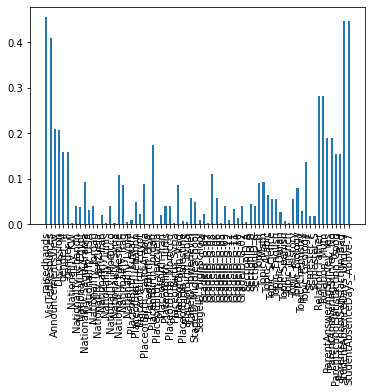

In [ ]:
coefs = lr.coef_[0]
lr.coef_[0], lr.coef_[1], lr.coef_[2]

coefs = coefs.reshape(-1)
cols = trd.columns
coef_sr = abs(pd.Series(coefs, index=cols))

plt.bar(coef_sr.index, coef_sr, width=0.5)
plt.xticks(rotation=90)

coef_sr

# 확률적 경사 하강법을 이용해 학습시키기

0.8388888888888889 0.6833333333333333


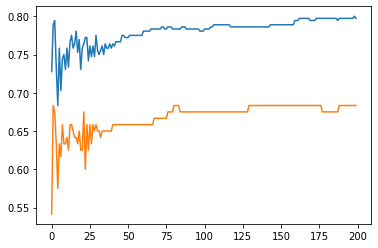

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', random_state=45)

tr_list = []
ts_list = []
for i in range(200):
  sc.partial_fit(trd, trt, classes=np.unique(target))
  tr_list.append(sc.score(trd, trt))
  ts_list.append(sc.score(tsd, tst))

plt.plot(tr_list)
plt.plot(ts_list)

sc = SGDClassifier(loss='log', max_iter=200, tol=None, random_state=45)
sc.fit(trd, trt)

print(sc.score(trd, trt), sc.score(tsd, tst))